In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [44]:
data = pd.read_csv('./data/home.csv', usecols=["relative_time", "LinearAccelerometerSensor"], na_values="NaN")
data = data.dropna()

ts = data.relative_time/1000 # Use seconds instead of ms
az = data.LinearAccelerometerSensor

ts = ts.as_matrix()
az = az.as_matrix()

print(az)

[ 0.05917631  0.03974808  0.06662204  0.0254503   0.07137668  0.03216072
  0.05939709  0.04876974  0.08138495  0.0647899   0.08908295  0.05973105
  0.09038627  0.05909113  0.08116009  0.06014563  0.07147639  0.04449455
  0.06319029  0.04068239  0.06831268  0.04972141  0.0531255   0.07045067
  0.04597735  0.05608187  0.04758117  0.06359296  0.04360748  0.05966891
  0.04567495  0.07827087  0.1119195   0.10066188  0.09319043  0.05317833
  0.06335798  0.07754408  0.04193567  0.05413686  0.04187807  0.05540943
  0.02200042  0.02840686  0.07357756  0.03319256  0.055006    0.01477233
  0.03709739  0.02534604  0.01426241  0.04214697  0.02671155  0.01814597
  0.0298725   0.01449307  0.0286342   0.022065    0.01359181  0.03072187
  0.02396089  0.03043034  0.02759085  0.02081482  0.01828152  0.0133592
  0.02409828  0.02340542  0.04113148  0.01734774  0.01983063  0.02375242
  0.01647484  0.02061125  0.01159391  0.0096161   0.01631662  0.00889419
  0.00813526  0.01707705  0.01017877  0.01456274  0.

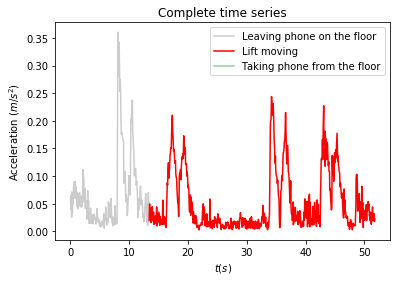

In [45]:
indices = [0, 200, 2650, ts.size]
ts_init = ts[indices[0]:indices[1]]
az_init = az[indices[0]:indices[1]]

ts_experiment = ts[indices[1]:indices[2]]
az_experiment = az[indices[1]:indices[2]]

ts_out = ts[indices[2]:indices[3]]
az_out = az[indices[2]:indices[3]]

plt.plot(ts_init, az_init, color='gray', alpha=0.4)
plt.plot(ts_experiment, az_experiment, color='red')
plt.plot(ts_out, az_out, color='green', alpha=0.4)

plt.title('Complete time series')
plt.xlabel('$t (s)$')
plt.ylabel('Acceleration $(m / s^2)$')
plt.legend(['Leaving phone on the floor', 'Lift moving', 'Taking phone from the floor']);

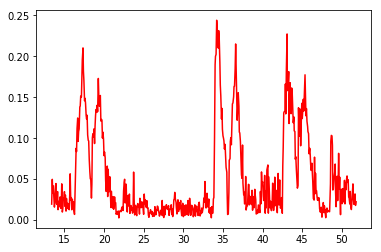

In [46]:
plt.plot(ts_experiment, az_experiment, color='red')

In [47]:
az_experiment_detrended = az_experiment - az_experiment.mean()

In [48]:
from scipy import integrate
import numpy as np

In [49]:
v = np.zeros(ts_experiment.size-1)
for i in range(1, ts_experiment.size):
    y_temp = az_experiment_detrended[:i]
    t_temp = ts_experiment[:i]
    v[i-1] = integrate.simps(y_temp, t_temp)
    
x = np.zeros(ts_experiment.size-2)
for i in range(1, ts_experiment.size-1):
    y_temp = v[:i]
    t_temp = ts_experiment[:i]
    x[i-1] = integrate.simps(y_temp, t_temp)

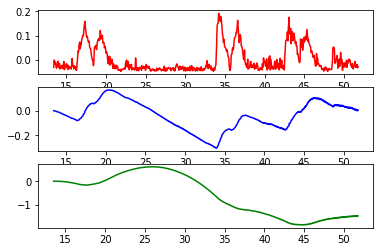

In [50]:
plt.subplot(311)
plt.plot(ts_experiment, az_experiment_detrended, color='red')

plt.subplot(312)
plot(ts_experiment[1:], v, color='blue')

plt.subplot(313)
plot(ts_experiment[2:], x, color='green')